In [2]:
#import important libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder




In [4]:
#load the datasets
df=pd.read_csv('EastWestAirlines.csv')
df
df.set_index('ID#', inplace=True)
df



,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [5]:
#use value counts
df['Qual_miles'].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [6]:
df['cc1_miles'].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [7]:
df['cc2_miles'].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [8]:
df['cc3_miles'].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [9]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [10]:
df['Flight_miles_12mo'].value_counts()

Flight_miles_12mo
0        2723
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: count, Length: 343, dtype: int64

In [11]:
df['Balance'].isna().sum()

0

In [12]:
df['Qual_miles'].isna().sum()


0

In [13]:
df['cc1_miles'].isna().sum()

0

In [14]:
df['cc2_miles'].isna().sum()

0

In [15]:
df['cc3_miles'].isna().sum()

0

In [16]:
df['Bonus_miles'].isna().sum()

0

In [17]:
df['Bonus_trans'].isna().sum()

0

In [18]:
df['Flight_miles_12mo'].isna().sum()

0

In [19]:
df['Flight_trans_12'].isna().sum()

0

In [20]:
df['Days_since_enroll'].isna().sum()

0

In [21]:
df['Award?'].isna().sum()

0

In [22]:
df['Award?'].dtypes

dtype('int64')

In [23]:
#handle missing value
imputer=SimpleImputer()
imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
imputed


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


In [24]:
# Convert categorical to numerical
label_encoder = LabelEncoder()
df['Award?'] = label_encoder.fit_transform(df['Award?'])
df['cc2_miles'] = label_encoder.fit_transform(df['cc2_miles'])





<Axes: >

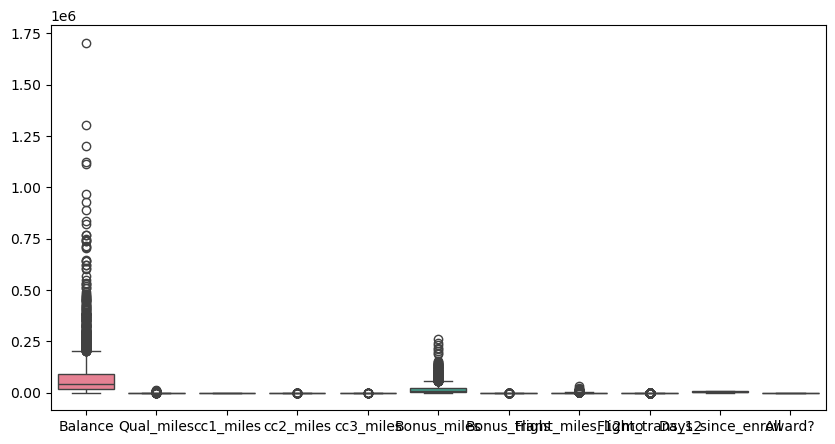

In [25]:
#check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(df)

In [26]:
#remove outliers
from scipy import stats
scores=np.abs(stats.zscore(imputed))
z=imputed[(scores<3).all(axis=1)]
z

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


<Axes: >

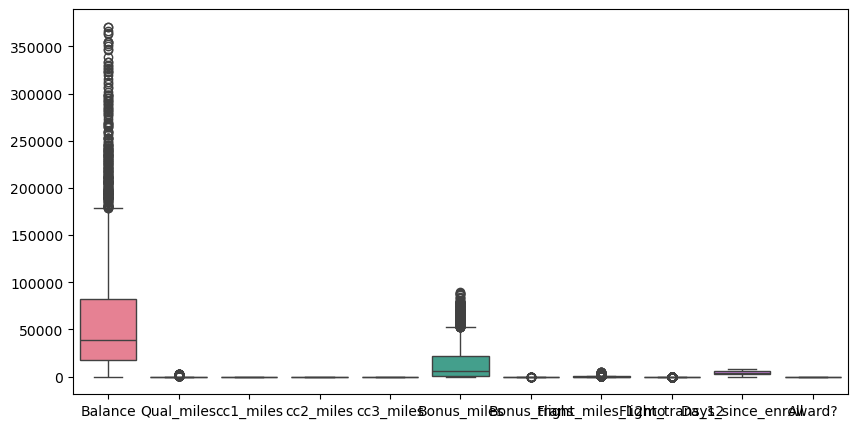

In [27]:
#check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(z)

In [28]:
sc=StandardScaler()
df_scaled=sc.fit_transform(z)


In [29]:
df_scaled

array([[-0.52326043, -0.15886912, -0.75566439, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-0.66708419, -0.15886912, -0.75566439, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-0.30974703, -0.15886912, -0.75566439, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 0.21135753, -0.15886912,  0.75983933, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [-0.0908356 , -0.15886912, -0.75566439, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [-0.9293577 , -0.15886912, -0.75566439, ..., -0.43177507,
        -1.29775907, -0.71809304]])

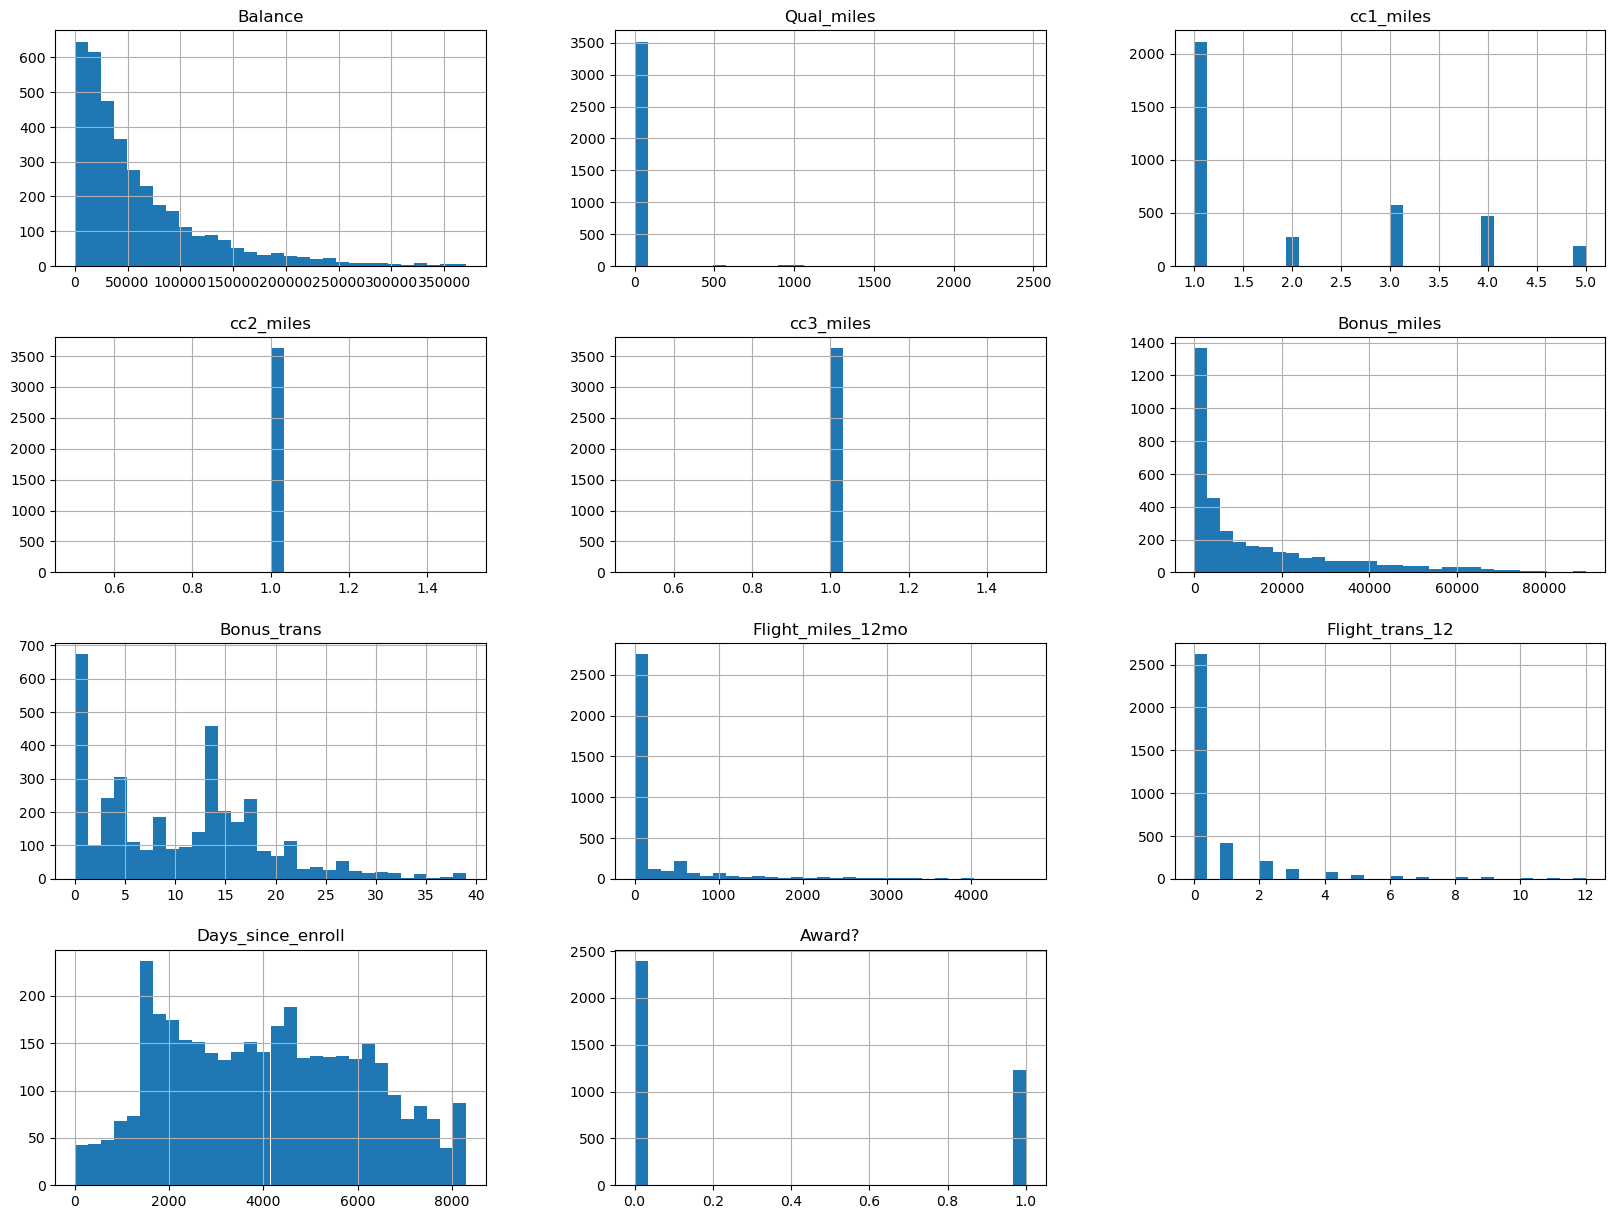

In [30]:
z.hist(bins=30, figsize=(20, 15))
plt.show()

In [31]:
#quantify the relation
corr=z.corr(numeric_only=True)
corr


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.062103,0.424224,NaN,NaN,0.458652,0.354254,0.195742,0.199219,0.252823,0.103921
Qual_miles,0.062103,1.000000,0.003124,NaN,NaN,0.024565,0.029112,0.101793,0.109196,0.017725,0.092437
cc1_miles,0.424224,0.003124,1.000000,NaN,NaN,0.912336,0.648961,0.030123,0.027420,0.209411,0.325778
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.458652,0.024565,0.912336,NaN,NaN,1.000000,0.632268,0.113377,0.114882,0.194819,0.366759
Bonus_trans,0.354254,0.029112,0.648961,NaN,NaN,0.632268,1.000000,0.192588,0.218210,0.147453,0.288655
Flight_miles_12mo,0.195742,0.101793,0.030123,NaN,NaN,0.113377,0.192588,1.000000,0.868124,0.033465,0.194523
Flight_trans_12,0.199219,0.109196,0.027420,NaN,NaN,0.114882,0.218210,0.868124,1.000000,0.037372,0.217880
Days_since_enroll,0.252823,0.017725,0.209411,NaN,NaN,0.194819,0.147453,0.033465,0.037372,1.000000,0.163530


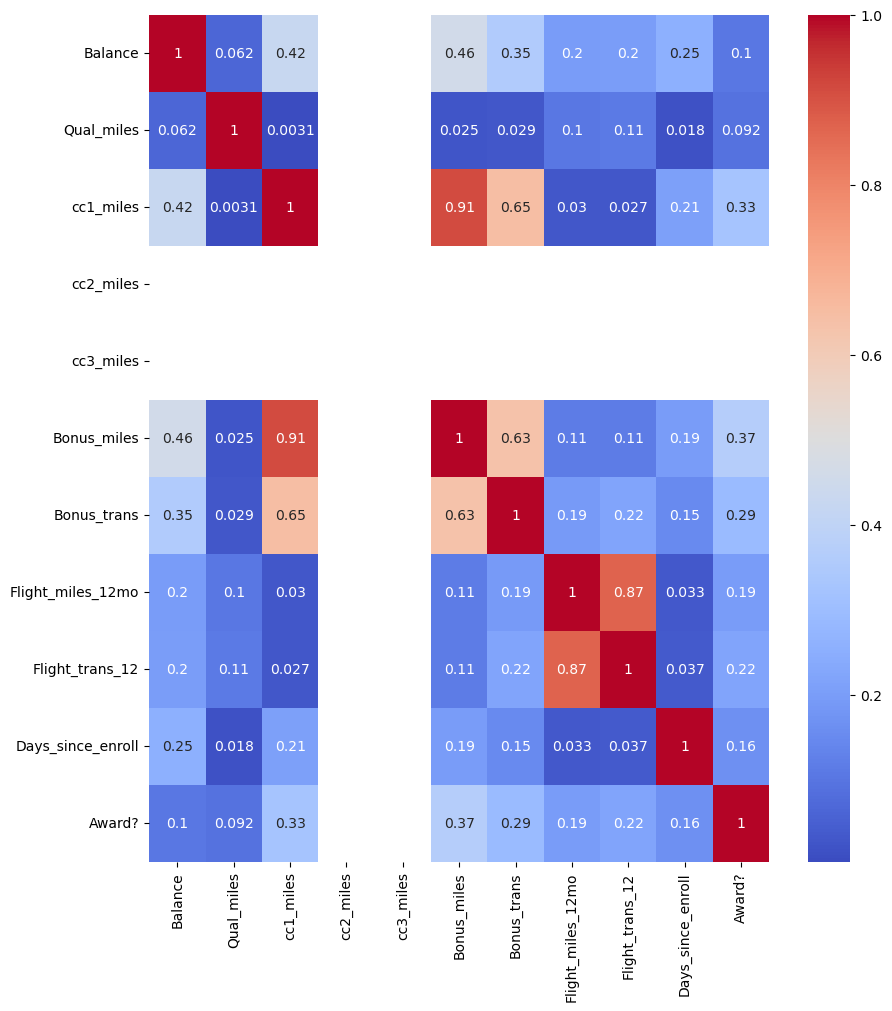

In [32]:
# Visualize the correlation matrix
plt.figure(figsize=(10,11))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [33]:
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

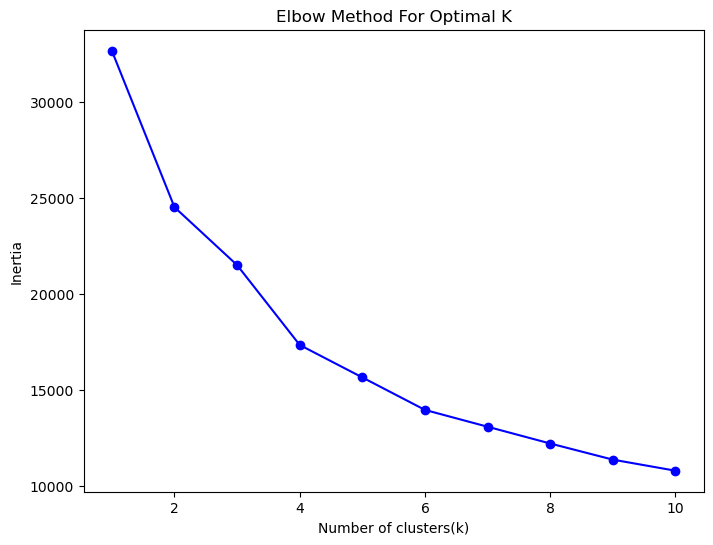

In [34]:
#plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(K,inertia,'bo-')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()




In [35]:
inertia

[32670.000000000004,
 24515.1189348673,
 21493.948269311808,
 17330.886693917677,
 15638.685472887157,
 13944.564622579153,
 13068.022233105237,
 12193.977280615178,
 11352.769128607804,
 10775.069684907778]

In [36]:
# Apply K-Means with optimal clusters (e.g., K=4 based on elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
predict = kmeans.fit_predict(df_scaled)



In [37]:
predict

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
newkmeans = KMeans(n_clusters=3, random_state=42)
newpredict = newkmeans.fit_predict(df_scaled)



In [39]:
newpredict

array([0, 0, 0, ..., 1, 0, 0])

In [40]:
# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, predict)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')


Silhouette Score for K-Means: 0.3316635667716135


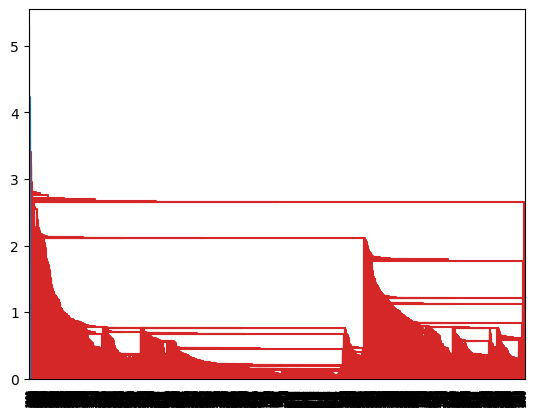

In [41]:
#Hierarchical
#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_scaled,method='single'))

In [42]:
dendrogram

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [25.0, 25.0, 50.0, 50.0],
  [15.0, 15.0, 37.5, 37.5],
  [75.0, 75.0, 85.0, 85.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [395.0, 395.0, 405.0, 405.0],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [400.0, 400.0, 422.5, 422.5],
  [385.0, 385.0, 411.25, 411.25],
  [455.0, 455.0, 465.0, 465.0],
  [475.0, 475.0, 485.0, 485.0],
  [460.0, 460.0, 480.0, 480.0],
  [445.0, 445.0, 470.0, 470.0],
  [505.0, 505.0, 515.0, 515.0],
  [575.0, 575.0, 585.0, 585.0],
  [565.0, 565.0, 580.0, 580.0],
  [555.0, 555.0, 572.5, 572.5],
  [545.0, 545.0, 563.75, 563.75],
  [535.0, 535.0, 554.375, 554.375],
  [525.0, 525.0, 544.6875, 544.6875],
  [510.0, 510.0, 534.84375, 534.84375],
  [495.0, 495.0, 522.421875, 522.421875],
  [457.5, 457.5, 508.7109375, 508.7109375],
  [398.125, 398.125, 483.10546875, 483.105

In [43]:
# create clusters, suppose got input from customerned that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean',linkage = 'single')

In [44]:
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [45]:
y_hc=hc.fit_predict(df_scaled)
clusters=pd.DataFrame(y_hc,columns=['Cluster_no'])

In [46]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
clusters

,Cluster_no
0,0
1,0
2,0
3,0
4,0
...,...
3625,0
3626,0
3627,0
3628,0


In [48]:
df_scaled

array([[-0.52326043, -0.15886912, -0.75566439, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-0.66708419, -0.15886912, -0.75566439, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-0.30974703, -0.15886912, -0.75566439, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 0.21135753, -0.15886912,  0.75983933, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [-0.0908356 , -0.15886912, -0.75566439, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [-0.9293577 , -0.15886912, -0.75566439, ..., -0.43177507,
        -1.29775907, -0.71809304]])

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering with ward linkage
linked = linkage(df_scaled, method='ward')
linked



array([[3.03800000e+03, 3.51500000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.40300000e+03, 2.40400000e+03, 3.18362633e-03, 2.00000000e+00],
       [2.49000000e+03, 2.92700000e+03, 3.53500119e-03, 2.00000000e+00],
       ...,
       [7.24600000e+03, 7.24800000e+03, 7.61289175e+01, 2.22000000e+02],
       [7.25400000e+03, 7.25600000e+03, 8.72614575e+01, 1.58500000e+03],
       [7.25500000e+03, 7.25700000e+03, 1.20029119e+02, 3.63000000e+03]])

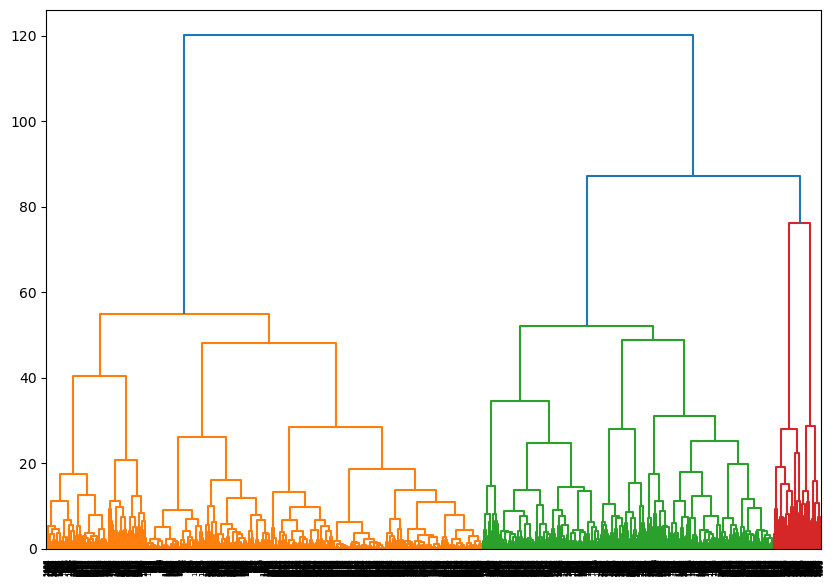

In [50]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()


In [51]:
from sklearn. cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)




In [52]:
dbscan

DBSCAN()

In [53]:
dbscan_labels

array([ 0,  0,  0, ..., -1, 17,  0], dtype=int64)

In [54]:
silhouette_dbscan

-0.28687511668198656

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)  # df_scaled should be your scaled dataset

# Count how many clusters and noise points (-1)
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
cluster_distribution = dict(zip(unique_labels, counts))
print("Cluster Distribution:", cluster_distribution)

# Calculate silhouette score (only if more than 1 cluster and not all noise)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    score = silhouette_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print("Silhouette Score (DBSCAN):", score)
elif len(set(dbscan_labels)) > 1:
    score = silhouette_score(df_scaled, dbscan_labels)
    print("Silhouette Score (DBSCAN):", score)
else:
    print("Silhouette Score not valid: only one cluster or all points marked as")
